In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("input/clean_measures.csv", index_col = 0)

In [4]:
df_E10 = df[df.gas_type == 'E10']
df_SP98 =  df[df.gas_type == 'SP98']

## SP95 E10 statistics

In [5]:
df_E10.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,160.000000,160.000000,160.000000,157.000000,160.000000,160.000000,160.000000,160.000000,5.000000
mean,21.096250,4.931250,43.506250,21.917197,10.118750,0.043750,0.100000,0.075000,39.600000
std,20.307234,0.900956,14.077949,0.659854,6.392185,0.205181,0.300942,0.264218,3.056959
min,1.700000,3.700000,14.000000,21.000000,-5.000000,0.000000,0.000000,0.000000,37.700000
25%,12.075000,4.400000,35.000000,21.500000,6.000000,0.000000,0.000000,0.000000,38.000000
50%,15.400000,4.800000,42.000000,21.500000,9.000000,0.000000,0.000000,0.000000,38.300000
75%,21.200000,5.300000,51.000000,22.500000,14.250000,0.000000,0.000000,0.000000,39.000000
max,130.300000,10.800000,88.000000,25.000000,27.000000,1.000000,1.000000,1.000000,45.000000


## SP98 statistics

In [6]:
df_SP98.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,228.000000,228.000000,228.000000,219.000000,228.000000,228.000000,228.000000,228.000000,8.000000
mean,18.639912,4.899123,40.820175,21.938356,12.228070,0.100877,0.140351,0.087719,35.562500
std,24.179598,1.118408,13.170122,1.201906,7.271373,0.301829,0.348115,0.283509,10.672787
min,1.300000,3.300000,16.000000,19.000000,-3.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.200000,32.000000,21.500000,7.000000,0.000000,0.000000,0.000000,37.150000
50%,14.150000,4.700000,39.500000,22.000000,11.000000,0.000000,0.000000,0.000000,37.650000
75%,18.150000,5.225000,48.000000,22.000000,17.000000,0.000000,0.000000,0.000000,39.500000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


# Consume/gas type
Obviously we first want to look at the relationship between gas type and consume.

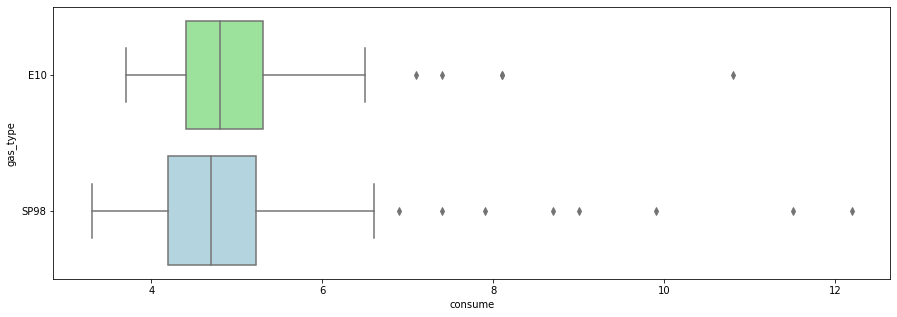

In [104]:
plt.figure(figsize=(15,5))
sns.boxplot(x="consume", y="gas_type", palette=["lightgreen", "lightblue"], data=df);

In [41]:
SP98_max = df[df.gas_type == "SP98"].consume.max()
E10_max = df[df.gas_type == "E10"].consume.max()
SP98_min = df[df.gas_type == "SP98"].consume.min()
E10_min = df[df.gas_type == "E10"].consume.min()
SP98_mean = df[df.gas_type == "SP98"].consume.mean()
E10_mean = df[df.gas_type == "E10"].consume.mean()

### Outliers

In [83]:
print("SP98 MAX")
display(df[df.consume == SP98_max ])
print("SP98 MIN")
display(df[df.consume == SP98_min ])
print("E10 MAX")
display(df[df.consume == E10_max  ])
print("E10 MIN")
display(df[(df.consume == E10_min) & (df.gas_type == "E10")   ])

SP98 MAX


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters
61,2.1,12.2,23,21.5,9,NaN,SP98,1,1,0,NaN


SP98 MIN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters
44,5.4,3.3,32,21.5,7,NaN,SP98,0,0,0,37.6


E10 MAX


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters
147,1.7,10.8,14,21.5,10,rain,E10,0,1,0,NaN


E10 MIN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters
325,16.6,3.7,49,22.0,17,NaN,E10,0,0,0,37.7
337,16.0,3.7,45,22.0,17,NaN,E10,0,0,0,NaN


# Consume/speed

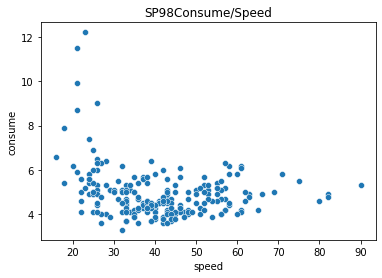

In [11]:
sns.scatterplot(x=df_SP98.speed, y=df_SP98.consume, data=df);
plt.title('SP98Consume/Speed');

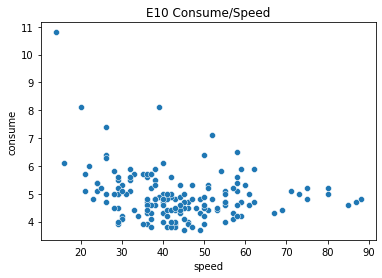

In [12]:
sns.scatterplot(x=df_E10.speed, y=df_E10.consume, data=df);
plt.title('E10 Consume/Speed');

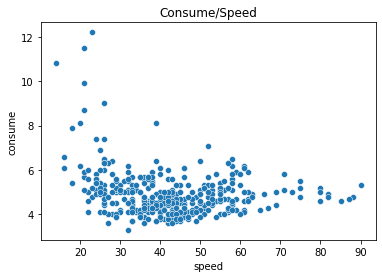

In [13]:
sns.scatterplot(x=df.speed, y=df.consume, data=df);
plt.title('Consume/Speed');

This figure confirms that lower speeds consume more gas.

# Consume/AC

In [26]:
df.AC = df.AC.replace(0, "OFF")
df.AC = df.AC.replace(1, "ON")
df_E10.AC = df_E10.AC.replace(0, "OFF")
df_E10.AC = df_E10.AC.replace(1, "ON")
df_SP98.AC = df_SP98.AC.replace(0, "OFF")
df_SP98.AC = df_SP98.AC.replace(1, "ON")

c:\users\ux533f\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


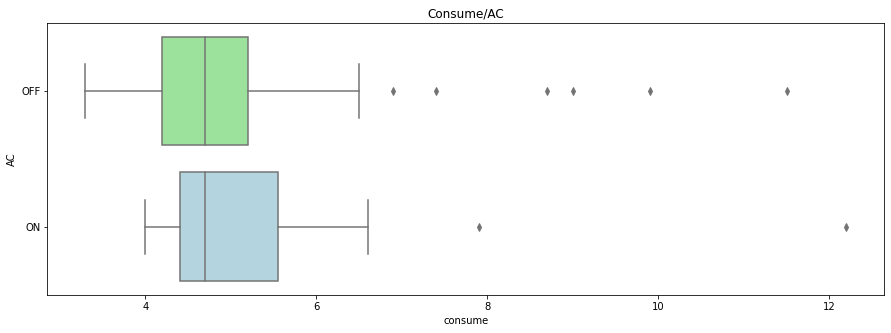

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(x="consume", y="AC", palette=["lightgreen", "lightblue"], data=df);
plt.title('Consume/AC');

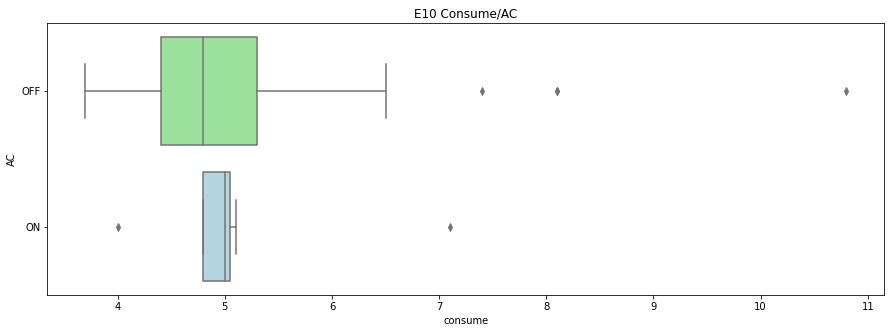

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(x="consume", y="AC", palette=["lightgreen", "lightblue"], data=df_E10);
plt.title('E10 Consume/AC');

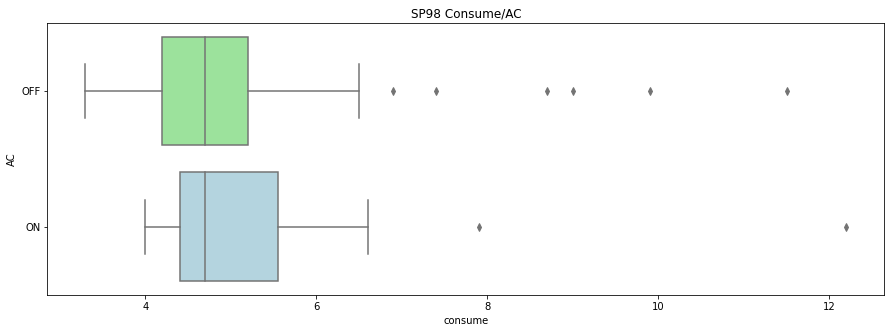

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(x="consume", y="AC", palette=["lightgreen", "lightblue"], data=df_SP98);
plt.title('SP98 Consume/AC');

In [25]:
df_SP98.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,external_temp
44,5.4,3.3,32,21.5,7,NaN,SP98,0,0,0,37.6,COLD
45,2.0,9.9,21,21.5,4,NaN,SP98,0,0,0,NaN,COLD
46,14.2,5.1,32,21.5,7,NaN,SP98,0,0,0,NaN,COLD
47,16.0,4.9,25,21.5,8,NaN,SP98,0,0,0,NaN,COLD
48,11.8,4.9,25,21.5,11,NaN,SP98,0,0,0,NaN,COLD


# Consume/RAIN

In [30]:
df.rain = df.rain.replace(0, "NO RAIN")
df.rain = df.rain.replace(1, "RAIN")
df_E10.rain = df_E10.rain.replace(0, "NO RAIN")
df_E10.rain = df_E10.rain.replace(1, "RAIN")
df_SP98.rain = df_SP98.rain.replace(0, "NO RAIN")
df_SP98.rain = df_SP98.rain.replace(1, "RAIN")

c:\users\ux533f\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


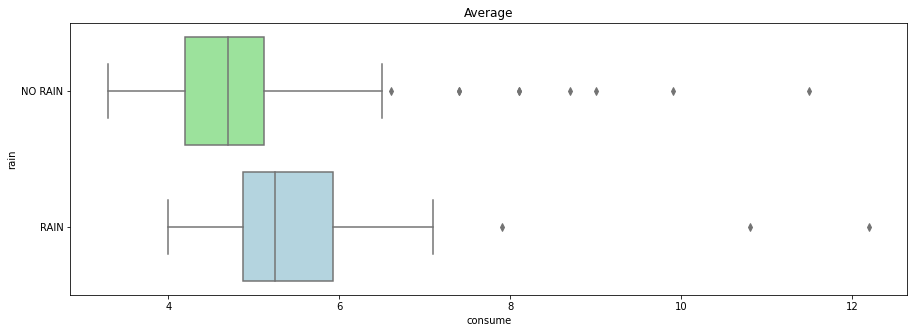

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(x="consume", y="rain", palette=["lightgreen", "lightblue"], data=df);
plt.title('Average');

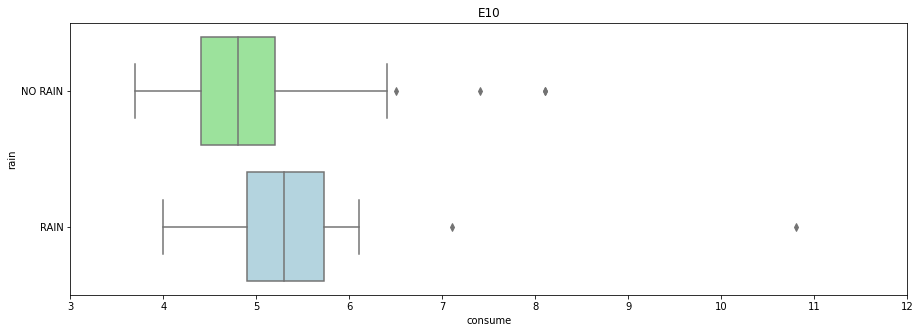

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(x="consume", y="rain", palette=["lightgreen", "lightblue"], data=df_E10);
plt.xlim(3,12)
plt.title('E10');

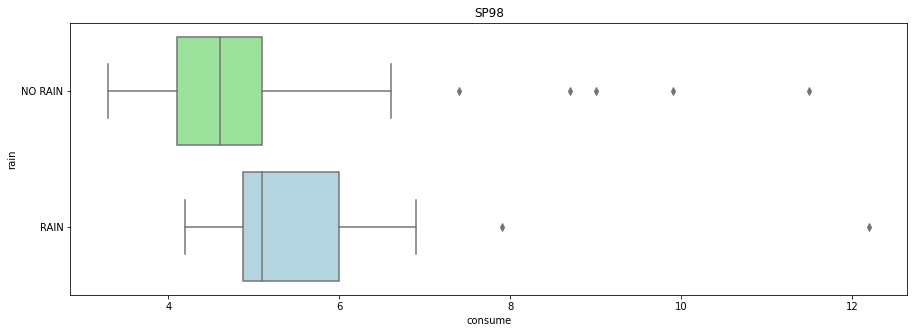

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(x="consume", y="rain", palette=["lightgreen", "lightblue"], data=df_SP98);
plt.title('SP98');

# Consume/distance

(0.0, 220.0)

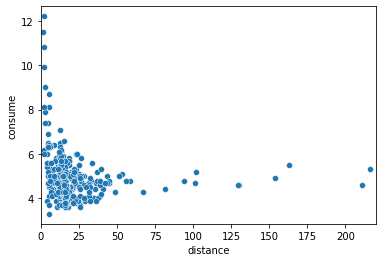

In [47]:
sns.scatterplot(x=df.distance, y=df.consume, data=df);
plt.xlim(0,220)

(0.0, 220.0)

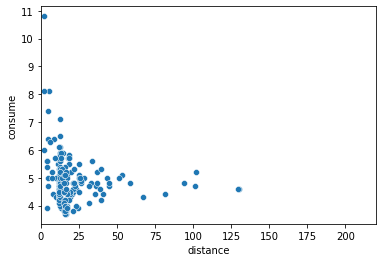

In [46]:
sns.scatterplot(x=df_E10.distance, y=df_E10.consume);
plt.xlim(0,220)

(0.0, 220.0)

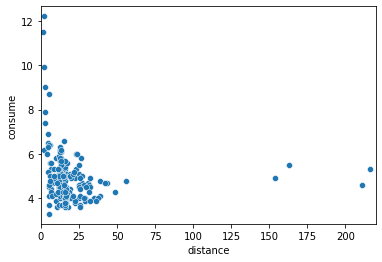

In [45]:
sns.scatterplot(x=df_SP98.distance, y=df_SP98.consume);
plt.xlim(0,220)

# Consume/External_temp

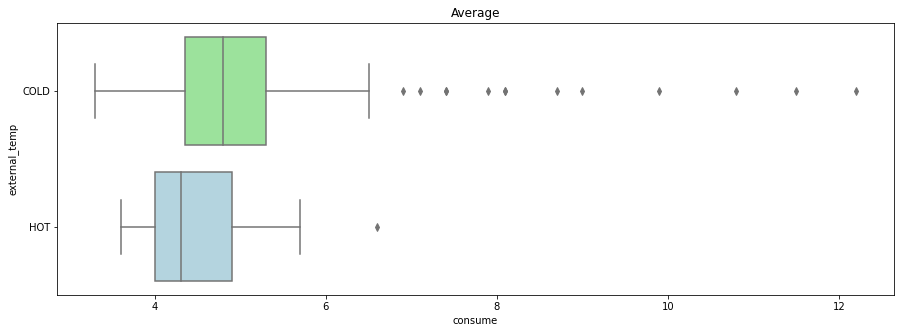

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(x="consume", y="external_temp", palette=["lightgreen", "lightblue"], data=df);
plt.title('Average');

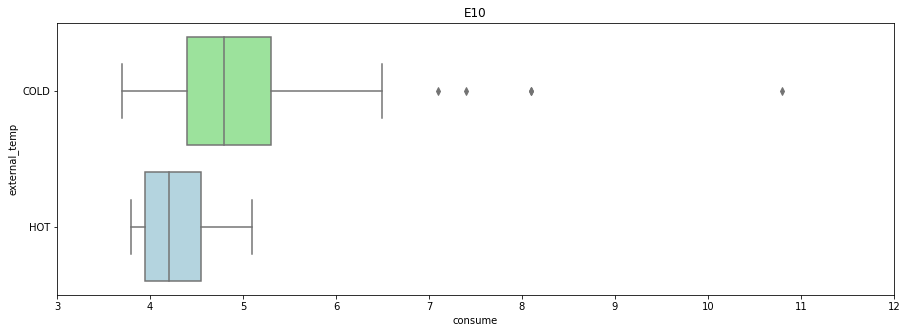

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(x="consume", y="external_temp", palette=["lightgreen", "lightblue"], data=df_E10);
plt.xlim(3,12)
plt.title('E10');

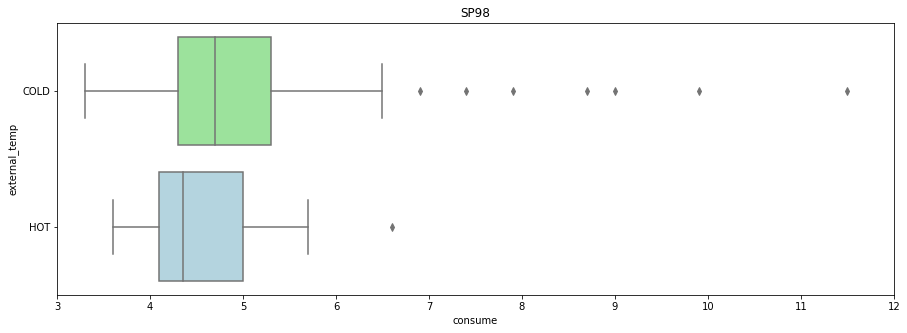

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(x="consume", y="external_temp", palette=["lightgreen", "lightblue"], data=df_SP98);
plt.xlim(3,12)
plt.title('SP98');